# predicting this :  

##     y = 7X+3

In [ ]:
import torch 
from torch import nn #! nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [94]:
from tqdm import tqdm


## data (34 sample)

In [16]:
weight = 7 
bias = 3 

X = torch.arange(0,1,0.03)

y = weight*X+bias

X[:10],y[:10] , len(X)

(tensor([0.0000, 0.0300, 0.0600, 0.0900, 0.1200, 0.1500, 0.1800, 0.2100, 0.2400,
         0.2700]),
 tensor([3.0000, 3.2100, 3.4200, 3.6300, 3.8400, 4.0500, 4.2600, 4.4700, 4.6800,
         4.8900]),
 34)

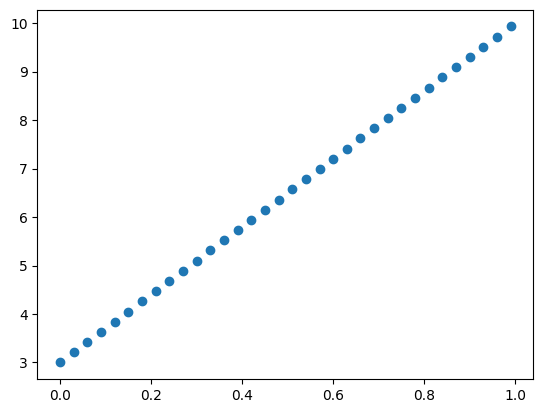

In [15]:
plt.scatter(X,y )

## data split 

In [21]:
train_split = int(0.8 * len(X))

X_train ,X_test , y_train,y_test = X[:train_split] , X[train_split:] , y[:train_split],y[train_split:]

len(X_train) , len(X_test) , len(y_train) , len(y_test) 


(27, 7, 27, 7)

### function to plot our predictions : 

In [40]:
def plot_predictions(
        train_data,
        train_labels,
        test_data,
        test_labels, 
        predictions = None
): 
    """ 
      Plots training data, test data and compares predictions.

    """
    plt.figure(figsize=(10,7))

    # todo : plot training data in blue : 
    plt.scatter(train_data ,train_labels , c='b' , label="train_data" )

    #todo : plot test data in green :
    plt.scatter(test_data ,test_labels , c='g' , label="train_data" ) 

    # todo : 
    if predictions is not None: 
        # print predictions in red : 
        plt.scatter(test_data , predictions , c="r", label="predictions")
    else: 
        print("there are no preds")


    plt.legend()

In [44]:
preds =  torch.rand(7) * 10 

preds , len(preds) , X_train

(tensor([4.5784, 6.2770, 8.5061, 9.9236, 1.7738, 2.5407, 0.2502]),
 7,
 tensor([0.0000, 0.0300, 0.0600, 0.0900, 0.1200, 0.1500, 0.1800, 0.2100, 0.2400,
         0.2700, 0.3000, 0.3300, 0.3600, 0.3900, 0.4200, 0.4500, 0.4800, 0.5100,
         0.5400, 0.5700, 0.6000, 0.6300, 0.6600, 0.6900, 0.7200, 0.7500, 0.7800]))

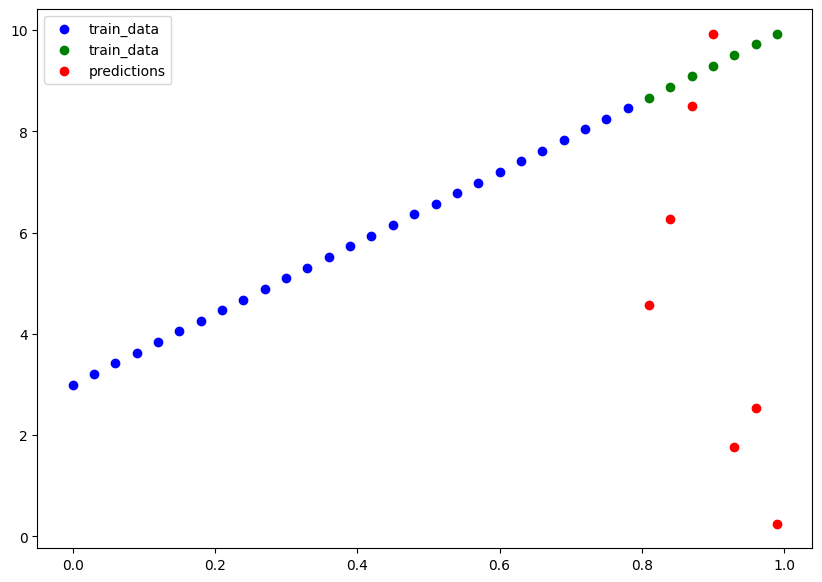

In [45]:
plot_predictions(X_train,y_train , X_test , y_test , preds )

## Building a model - linear regression model 

In [53]:
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,dtype=torch.float),  requires_grad=True  ) 
        
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)
        
    def forward(self,x):
        return self.weight*x + self.bias


In [114]:
model_0 = LinearRegressionModel()

In [115]:
model_0.state_dict()

OrderedDict([('weight', tensor([-0.1262])), ('bias', tensor([0.8495]))])

## making prediction with non-trained model : 

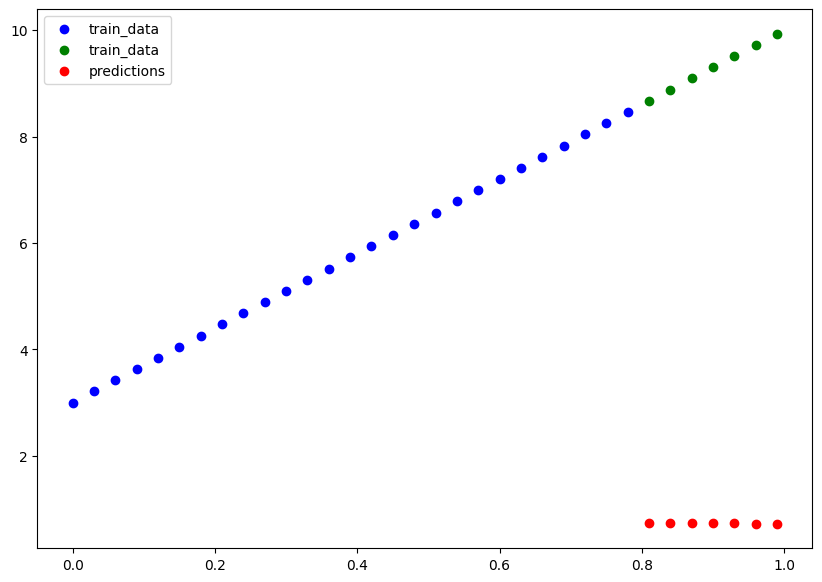

In [116]:
with torch.inference_mode(): 
    y_preds = model_0(X_test)

plot_predictions(X_train,y_train , X_test , y_test , y_preds )

In [117]:
print(len(y_preds))

print(f"y_preds :{y_preds}")
print(f"y_test :{y_test}")

7
y_preds :tensor([0.7472, 0.7435, 0.7397, 0.7359, 0.7321, 0.7283, 0.7245])
y_test :tensor([8.6700, 8.8800, 9.0900, 9.3000, 9.5100, 9.7200, 9.9300])


## the model params before training : 


In [118]:
model_0.state_dict()

OrderedDict([('weight', tensor([-0.1262])), ('bias', tensor([0.8495]))])

### OrderedDict([('weight', tensor([-0.1497])), ('bias', tensor([0.0970]))])

# Training the model 

## loss function

In [119]:
loss_fn = nn.L1Loss() # MAE loss  

## the optimizer

In [120]:
optimizer=torch.optim.SGD(model_0.parameters(),0.01)

## Training loop & Testing

In [121]:
epochs =1000

In [122]:
for epoch in tqdm(range(epochs)): 
    # ! TRAINING 
    # put the model on train mode 
    model_0.train()

    #! 1.the forwad pass : 
    y_preds = model_0(X_train)

    #! 2.calculate the loss : 
    loss = loss_fn(y_preds,y_train)

    #! 3.optimizer zero the grad (it accumulated by default):
    optimizer.zero_grad()  

    #! 4. perform the backprobagation on the loss : 
    loss.backward()

    #! 5. progress|step the optimizer (gradient decent)
    optimizer.step()

   
   
    # ! TESTING : 
    # put the model on evaluation mode : 
    model_0.eval()
    # usiing the infrence mode context manager : 
    with torch.inference_mode():
        
        #! 1.the forward pass : 
        y_preds = model_0(X_test)

        #! 2. calculate the loss : 
        test_loss = loss_fn(y_preds,y_test) 


    
    #! print what is going on : 
    if(epoch % 100 ==0):
        print(f"epoch : {epoch} , training_loss: {loss} | test_loss: {test_loss}")


    

 84%|████████▍ | 841/1000 [00:00<00:00, 4260.14it/s]

epoch : 0 , training_loss: 4.9297566413879395 | test_loss: 8.550601959228516
epoch : 100 , training_loss: 3.7776575088500977 | test_loss: 7.19960355758667
epoch : 200 , training_loss: 2.625558614730835 | test_loss: 5.848605155944824
epoch : 300 , training_loss: 1.7580281496047974 | test_loss: 4.661991596221924
epoch : 400 , training_loss: 1.335442066192627 | test_loss: 3.8061766624450684
epoch : 500 , training_loss: 1.1334701776504517 | test_loss: 3.208104372024536
epoch : 600 , training_loss: 1.0342828035354614 | test_loss: 2.8051490783691406
epoch : 700 , training_loss: 0.9756512641906738 | test_loss: 2.5299525260925293
epoch : 800 , training_loss: 0.9313899874687195 | test_loss: 2.332932710647583


100%|██████████| 1000/1000 [00:00<00:00, 4227.85it/s]

epoch : 900 , training_loss: 0.8947571516036987 | test_loss: 2.2009823322296143


## plot after training 

real : 7X+3


OrderedDict([('weight', tensor([2.7722])), ('bias', tensor([4.7346]))])

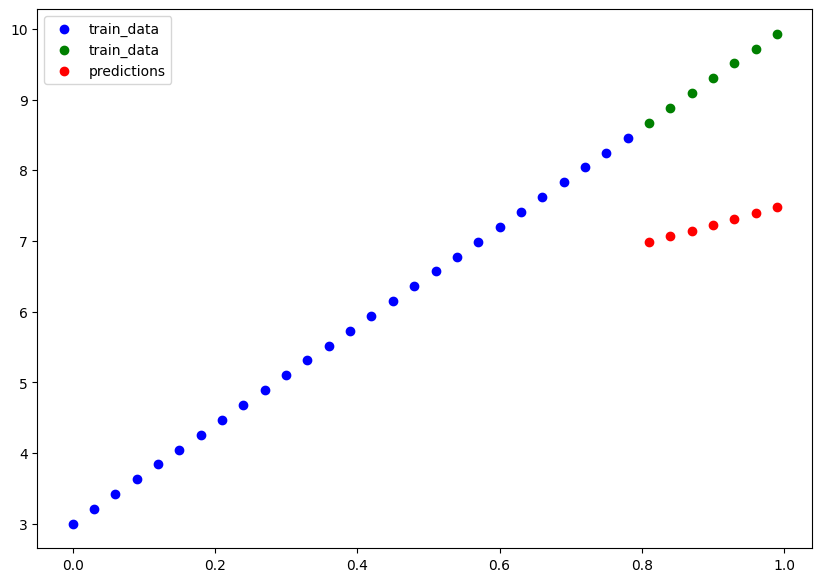

In [124]:
with torch.inference_mode(): 
    y_preds = model_0(X_test)

plot_predictions(X_train,y_train , X_test , y_test , y_preds )

print(f"real : 7X+3")
model_0.state_dict()

# EVEN MORE TRAINING 

In [125]:
epochs =1000

In [128]:
for epoch in tqdm(range(epochs)): 
    # ! TRAINING 
    # put the model on train mode 
    model_0.train()

    #! 1.the forwad pass : 
    y_preds = model_0(X_train)

    #! 2.calculate the loss : 
    loss = loss_fn(y_preds,y_train)

    #! 3.optimizer zero the grad (it accumulated by default):
    optimizer.zero_grad()  

    #! 4. perform the backprobagation on the loss : 
    loss.backward()

    #! 5. progress|step the optimizer (gradient decent)
    optimizer.step()

   
   
    # ! TESTING : 
    # put the model on evaluation mode : 
    model_0.eval()
    # usiing the infrence mode context manager : 
    with torch.inference_mode():
        
        #! 1.the forward pass : 
        y_preds = model_0(X_test)

        #! 2. calculate the loss : 
        test_loss = loss_fn(y_preds,y_test) 


    
    #! print what is going on : 
    if(epoch % 100 ==0):
        print(f"epoch : {epoch} , training_loss: {loss} | test_loss: {test_loss}")


    

 85%|████████▍ | 846/1000 [00:00<00:00, 4292.64it/s]

epoch : 0 , training_loss: 0.15375974774360657 | test_loss: 0.3620470464229584
epoch : 100 , training_loss: 0.1186130940914154 | test_loss: 0.27906036376953125
epoch : 200 , training_loss: 0.08346644788980484 | test_loss: 0.19607380032539368
epoch : 300 , training_loss: 0.04831980913877487 | test_loss: 0.11308697611093521
epoch : 400 , training_loss: 0.01317309495061636 | test_loss: 0.030100414529442787
epoch : 500 , training_loss: 0.004966055974364281 | test_loss: 0.011123930104076862
epoch : 600 , training_loss: 0.004966055974364281 | test_loss: 0.011123930104076862
epoch : 700 , training_loss: 0.004966055974364281 | test_loss: 0.011123930104076862
epoch : 800 , training_loss: 0.004966055974364281 | test_loss: 0.011123930104076862


100%|██████████| 1000/1000 [00:00<00:00, 4170.48it/s]

epoch : 900 , training_loss: 0.004966055974364281 | test_loss: 0.011123930104076862


real : 7X+3


OrderedDict([('weight', tensor([6.9949])), ('bias', tensor([3.0069]))])

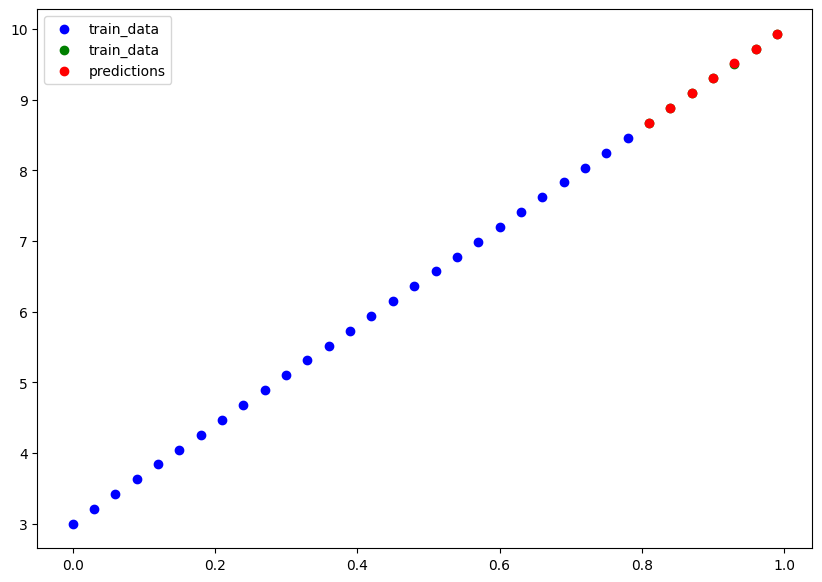

In [129]:
with torch.inference_mode(): 
    y_preds = model_0(X_test)

plot_predictions(X_train,y_train , X_test , y_test , y_preds )

print(f"real : 7X+3")
model_0.state_dict()

# ALMOST PERFECT 